In [1]:
from trotter.hamsimtrotter_scipy import AlgorithmHamSimTrotter
from pytket.pauli import Pauli, QubitPauliString
from pytket.utils import QubitPauliOperator
from pytket.circuit import Circuit,Qubit,fresh_symbol

import numpy as np
import matplotlib.pyplot as plt

In [2]:
initial_state_circ = Circuit(4)
# initial_state_circ.X(0)
# initial_state_circ.X(1)
t = fresh_symbol("a")

# hamiltonian_cheat = QubitPauliOperator(
#     {
#         QubitPauliString([Qubit(0)], [Pauli.Z]): 0.1,
#         QubitPauliString(
#             [Qubit(0), Qubit(1), Qubit(2), Qubit(3)],
#             [Pauli.Y, Pauli.Z, Pauli.X, Pauli.X],
#         ): 0.4,
#         QubitPauliString([Qubit(0), Qubit(1)], [Pauli.X, Pauli.X]): 0.2,
#     }
# )

# hamiltonian = QubitPauliOperator(
#     {
#         QubitPauliString([Qubit(0)], [Pauli.Z]): 0.1*t,
#         QubitPauliString(
#             [Qubit(0), Qubit(1), Qubit(2), Qubit(3)],
#             [Pauli.Y, Pauli.Z, Pauli.X, Pauli.X],
#         ): 0.4*t,
#         QubitPauliString([Qubit(0), Qubit(1)], [Pauli.X, Pauli.X]): 0.2*t,
#     }
# )

hamiltonian = QubitPauliOperator({QubitPauliString([Qubit(0)], [Pauli.Z]): 0.1*t,QubitPauliString([Qubit(1)], [Pauli.Z]): 0.2*t})

In [3]:
measurements = [QubitPauliOperator({QubitPauliString([Qubit(i)], [Pauli.Z]): 1}) for i in range(initial_state_circ.n_qubits)]
t_max=20
n_trotter_steps = 3

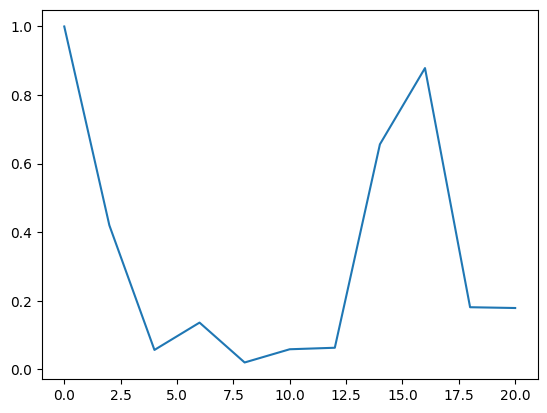

In [4]:
trotter_time_evolution_cheat = AlgorithmHamSimTrotter(initial_state_circ,hamiltonian_cheat,measurements,t_max,n_trotter_steps,t)
trotter_time_evolution_cheat.execute()

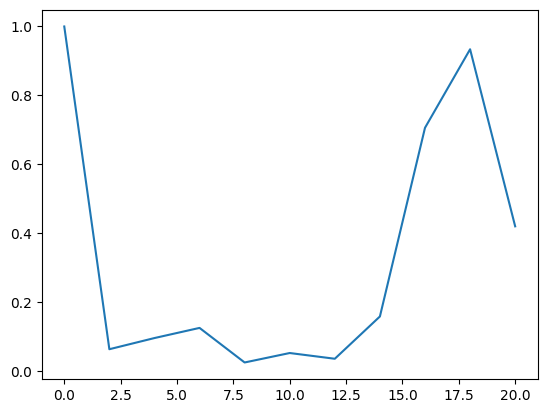

In [5]:
trotter_time_evolution = AlgorithmHamSimTrotter(initial_state_circ,hamiltonian,measurements,t_max,n_trotter_steps,t)
trotter_time_evolution.lie_trotter()
trotter_time_evolution.execute(False)

[]
1
[Rz(0.333333) q[0];, Rz(0.666667) q[1];, Rz(0.333333) q[0];, Rz(0.666667) q[1];]
2
1
[Rz(0.166667) q[0];, Rz(0.333333) q[1];, Rz(0.166667) q[0];, Rz(0.333333) q[1];, Rz(0.166667) q[0];, Rz(0.333333) q[1];, Rz(0.166667) q[0];, Rz(0.333333) q[1];, Rz(0.166667) q[0];, Rz(0.333333) q[1];, Rz(0.166667) q[0];, Rz(0.333333) q[1];]
3
2
1
[Rz(0.111111) q[0];, Rz(0.222222) q[1];, Rz(0.111111) q[0];, Rz(0.222222) q[1];, Rz(0.111111) q[0];, Rz(0.222222) q[1];, Rz(0.111111) q[0];, Rz(0.222222) q[1];, Rz(0.111111) q[0];, Rz(0.222222) q[1];, Rz(0.111111) q[0];, Rz(0.222222) q[1];, Rz(0.111111) q[0];, Rz(0.222222) q[1];, Rz(0.111111) q[0];, Rz(0.222222) q[1];, Rz(0.111111) q[0];, Rz(0.222222) q[1];, Rz(0.111111) q[0];, Rz(0.222222) q[1];, Rz(0.111111) q[0];, Rz(0.222222) q[1];, Rz(0.111111) q[0];, Rz(0.222222) q[1];]


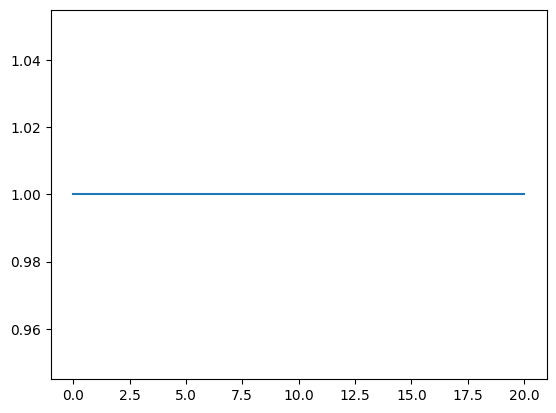

In [4]:
trotter_time_evolution2 = AlgorithmHamSimTrotter(initial_state_circ,hamiltonian,measurements,t_max,n_trotter_steps,t)
trotter_time_evolution2.second_order_suzuki_trotter()
trotter_time_evolution2.execute(False)

[]
[Rz(0.333333) q[0];, Rz(0.666667) q[1];, Rz(0.333333) q[0];, Rz(0.666667) q[1];]
[Rz(0.333333) q[0];, Rz(0.666667) q[1];, Rz(0.333333) q[0];, Rz(0.666667) q[1];, Rz(0.166667) q[0];, Rz(0.333333) q[1];, Rz(0.166667) q[0];, Rz(0.333333) q[1];, Rz(0.166667) q[0];, Rz(0.333333) q[1];, Rz(0.166667) q[0];, Rz(0.333333) q[1];]
[Rz(0.333333) q[0];, Rz(0.666667) q[1];, Rz(0.333333) q[0];, Rz(0.666667) q[1];, Rz(0.166667) q[0];, Rz(0.333333) q[1];, Rz(0.166667) q[0];, Rz(0.333333) q[1];, Rz(0.166667) q[0];, Rz(0.333333) q[1];, Rz(0.166667) q[0];, Rz(0.333333) q[1];, Rz(0.111111) q[0];, Rz(0.222222) q[1];, Rz(0.111111) q[0];, Rz(0.222222) q[1];, Rz(0.111111) q[0];, Rz(0.222222) q[1];, Rz(0.111111) q[0];, Rz(0.222222) q[1];, Rz(0.111111) q[0];, Rz(0.222222) q[1];, Rz(0.111111) q[0];, Rz(0.222222) q[1];]


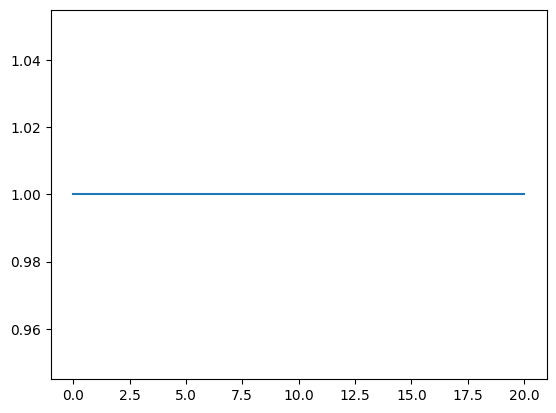

In [19]:
trotter_time_evolution_high = AlgorithmHamSimTrotter(initial_state_circ,hamiltonian,measurements,t_max,n_trotter_steps,t)
trotter_time_evolution_high.suzuki_trotter(2)
trotter_time_evolution_high.execute(False)